# Processing TESS sector 89 data for TOI4504

In [1]:
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
# from cs_flux_data import Transit
%matplotlib inline
path = '../data/TOI-4504/'

C_TRANSITS = [2458401.41, 2458483.21, 2458565.09, 2458647.33, 2459065.24, 2459148.48, 2459231.11, 2459313.25, 2459976.05, 2460059.62, 2460142.60]
# spoc_sectors = [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 61, 62, 63, 64, 65, 67, 68, 69, 87, 88, 89, 90, 94]
# spoc_sectors = [28, 31, 34, 37, 61, 64, 67, 88, 89, 94]
spoc_sectors = [89]


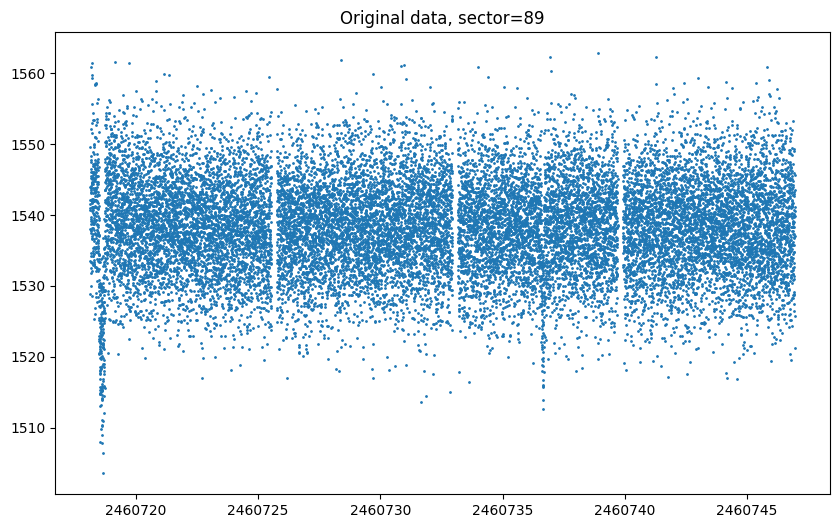

In [2]:
spoc_dfs = []
for sector in spoc_sectors:
    full_path = path + f"downloads/{sector}_SPOC_120.csv"
    # full_path = path + f"downloads/{sector}_SPOC_20.csv"
    # full_path = path + f"downloads/{sector}_QLP_200.csv"
    df = csv2df(full_path)
    df = tesstime2bjd(df)
    spoc_dfs.append(df)
    plot_this(df.time, [df.flux], ["flux"], title=f"Original data, {sector=}")

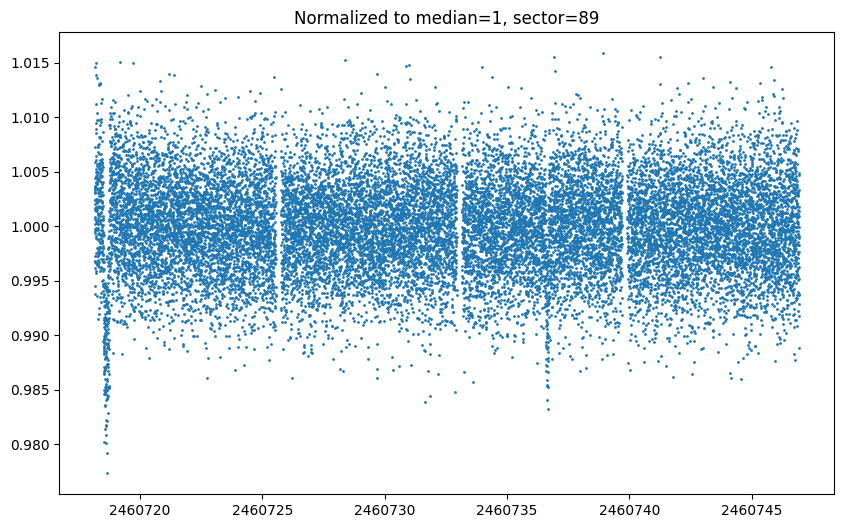

In [3]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    median = median_flux(df)
    df = scale_flux(df, 1/median)
    plot_this(df.time, [df.flux], ["flux"], title=f"Normalized to median=1, {sector=}")

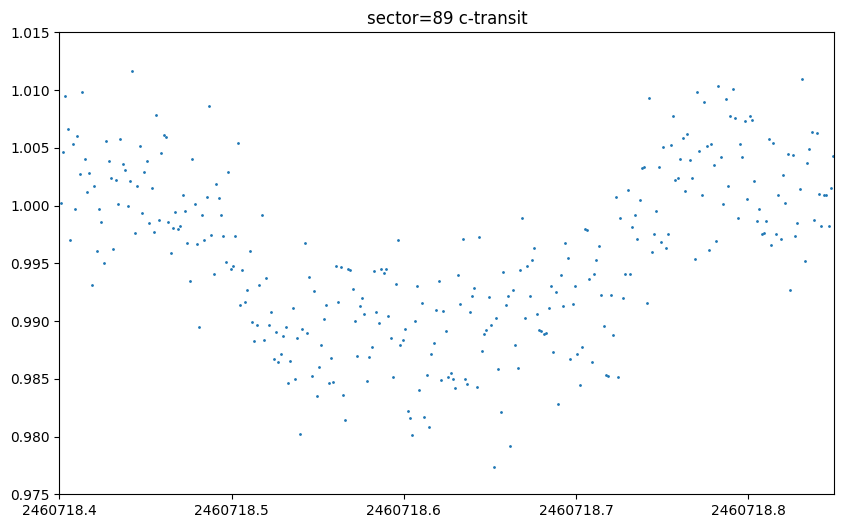

In [16]:
plot_this(df.time, [df.flux], ["flux"], title=f"{sector=} c-transit", left=2460718.4, right=2460718.85, top=1.015, bottom=0.975)


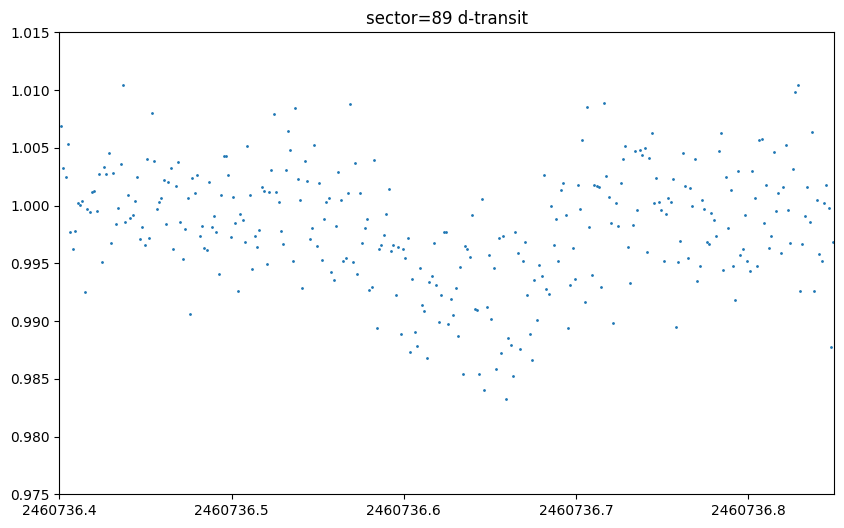

In [18]:
plot_this(df.time, [df.flux], ["flux"], title=f"{sector=} d-transit", left=2460736.4, right=2460736.85, top=1.015, bottom=0.975)

In [6]:
df

,time,flux,flux_err
0,2.460718e+06,1.002427,0.004658
1,2.460718e+06,0.996775,0.004651
2,2.460718e+06,1.001444,0.004660
3,2.460718e+06,1.007309,0.004660
4,2.460718e+06,0.993736,0.004646
...,...,...,...
20250,2.460747e+06,1.004699,0.004696
20251,2.460747e+06,0.988840,0.004683
20252,2.460747e+06,1.003311,0.004701
20253,2.460747e+06,0.999059,0.004698
